In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('Airlines+Data.xlsx') # loading the dataset

In [ ]:
data1 = pd.read_excel('Airlines+Data.xlsx',parse_dates=True,index_col=0,header=0) #loading the dataset for seasonal decompose

In [ ]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


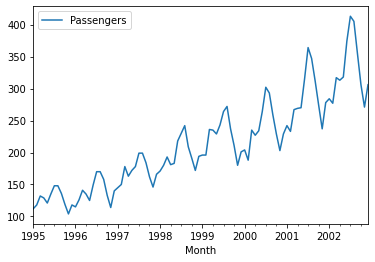

In [ ]:
data.plot() # plotting the line plot to see trend and seasonality

Linear trend with mulitiplicity seasonality

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd9c05390>]],
      dtype=object)

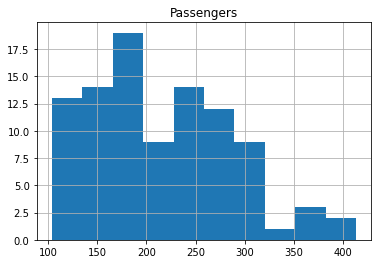

In [ ]:
data.hist()

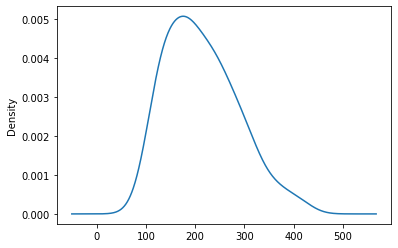

In [ ]:
data['Passengers'].plot(kind='kde')

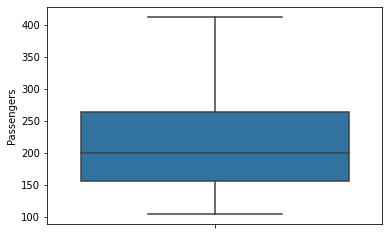

In [ ]:
sns.boxplot(y=data['Passengers'])

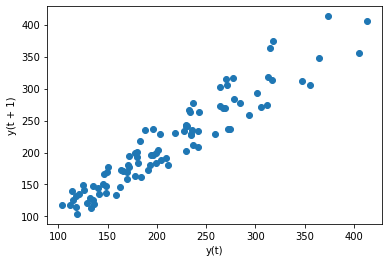

In [ ]:
from pandas.plotting import lag_plot # lagplot to see realation between yt and yt-1
lag_plot(data['Passengers'])

In [ ]:
data.shape

(96, 2)

In [ ]:
train = data.iloc[0:85] # separating the data 
test = data.iloc[84:]

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


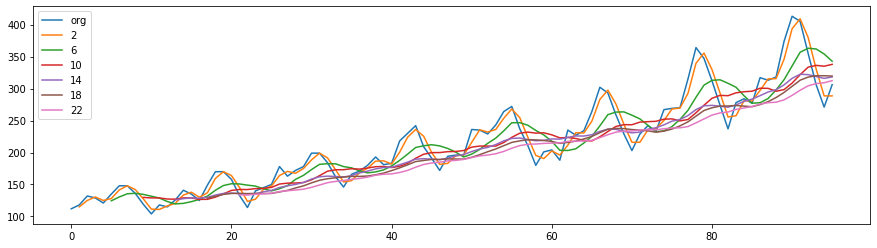

In [ ]:
plt.figure(figsize=(15,4)) # centre moving average smoothing technique
data['Passengers'].plot(label='org')
for i in range(2,24,4) :
  data['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')  


Figure(432x288)


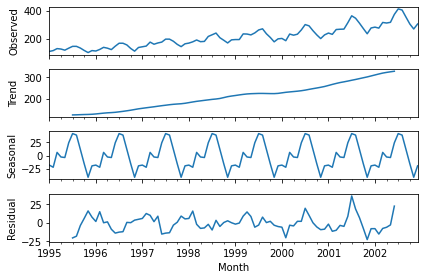

In [ ]:
decompose = seasonal_decompose(data1) # to check trend seasonality and noise separatily
print(decompose.plot())

Figure(432x288)


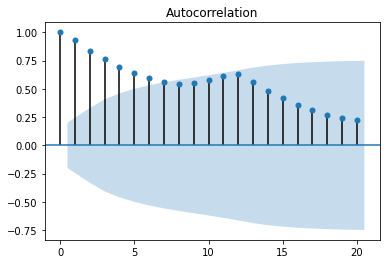

In [ ]:
import statsmodels.graphics.tsaplots as tsa
print(tsa.plot_acf(data['Passengers'])) # to see which lag is best

lag of 1 is the best.

In [ ]:
# defining the term
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
ses_model = SimpleExpSmoothing(train['Passengers']).fit() # no trend no seasonality
pred_ses = ses_model.predict(test.index[0]-test.index[-1])
rmse(pred_ses,test['Passengers'])

6.0

In [ ]:
hw_model = Holt(train['Passengers']).fit(smoothing_level=0.2, smoothing_slope=0.15) #trend with no seasonality
pred_hw = hw_model.predict(test.index[0]-test.index[-1])
rmse(pred_hw,test['Passengers'])

19.510242441376363

In [ ]:
hwe_model_add_add = ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit() # trend with additive seasonality
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse(pred_hwe_add_add,test['Passengers']) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


8.407185903749095

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() # trend with multiplitive seasonality
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse(pred_hwe_mul_add,test['Passengers'])

11.565405625710511

From the RMSE values and from the visualisation from seasonal decompose we found out that trend with additive seasonality is the best model

In [ ]:
hwe_model_add_add = ExponentialSmoothing(data['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit() # final model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [ ]:
pred = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1]) # predicting the data
pred = pred.rename('smoothing method predictions')

In [ ]:
pred,test['Passengers']

(84    285.740301
 85    275.863435
 86    314.299466
 87    318.564664
 88    320.561188
 89    361.713561
 90    406.690900
 91    387.506691
 92    354.331524
 93    316.778865
 94    280.222051
 95    317.503979
 Name: smoothing method predictions, dtype: float64, 84    284
 85    277
 86    317
 87    313
 88    318
 89    374
 90    413
 91    405
 92    355
 93    306
 94    271
 95    306
 Name: Passengers, dtype: int64)

In [ ]:
hwe_model_add_add.forecast(12) # forecasting for the next 12 months

96     320.924021
97     313.638039
98     352.925020
99     350.350301
100    356.060923
101    408.899129
102    446.143114
103    433.358026
104    382.762460
105    336.170254
106    303.315050
107    349.662471
dtype: float64

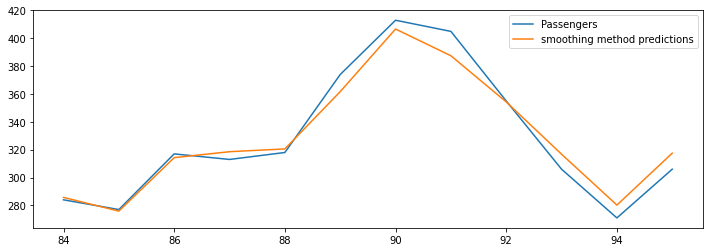

In [ ]:
plt.figure(figsize=(12,4)) # comparison of actual and predicted
test['Passengers'].plot(legend =True)
pred.plot(legend=True)

# Question 2

In [ ]:
sales = pd.read_excel('CocaCola_Sales_Rawdata.xlsx') # loading the dataset
sales.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [ ]:
quarter=['Q1','Q2','Q3','Q4'] # converting into quarters and dummy of quarter column
n=sales['Quarter'][0]
n[0:2]

sales['quarter']=0

for i in range(42):
    n=sales['Quarter'][i]
    sales['quarter'][i]=n[0:2]
    
dummy=pd.DataFrame(pd.get_dummies(sales['quarter']))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
sales.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [ ]:
coco=pd.concat((sales,dummy),axis=1) 
t= np.arange(1,43)
coco['t']=t
coco['t_square']=coco['t']*coco['t']

log_Sales=np.log(coco['Sales'])
coco['log_Sales']=log_Sales

In [ ]:
coco.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


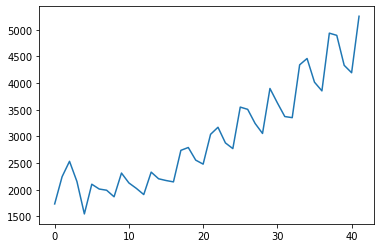

In [ ]:
coco['Sales'].plot() # line plot to see trend and seasonality

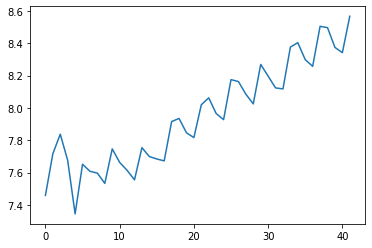

In [ ]:
coco['log_Sales'].plot()

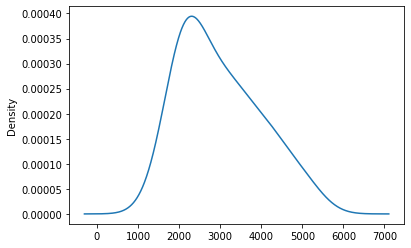

In [ ]:
coco['Sales'].plot(kind='kde')

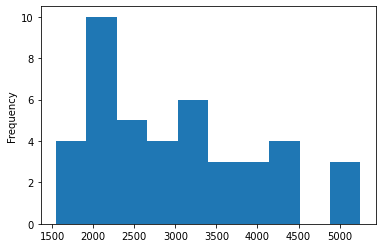

In [ ]:
coco['Sales'].plot(kind='hist')

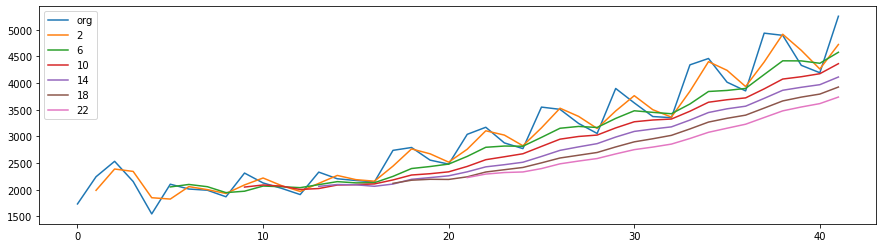

In [56]:
plt.figure(figsize=(15,4)) # centre moving average smoothing technique
sales['Sales'].plot(label='org')
for i in range(2,24,4) :
  sales['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')  

In [ ]:
coco.shape

(42, 10)

In [ ]:
train_2= coco.head(38) # separating the dataset
test_2=coco.tail(4)

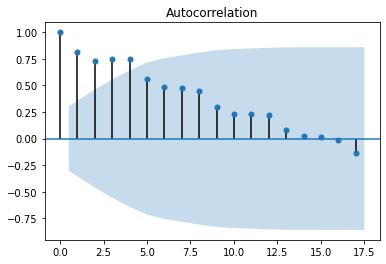

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots # to check which lag is best
acf = tsa_plots.plot_acf(coco['Sales'])


In [ ]:
!pip install pmdarima

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
model = ARIMA(train_2['log_Sales'],order=(3,1,3)) # model buildin with train data
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.log_Sales   No. Observations:                   37
Model:                 ARIMA(3, 1, 3)   Log Likelihood                  45.916
Method:                       css-mle   S.D. of innovations              0.064
Date:                Wed, 20 Oct 2021   AIC                            -75.832
Time:                        14:18:03   BIC                            -62.945
Sample:                             1   HQIC                           -71.289
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0197      0.007      2.690      0.012       0.005       0.034
ar.L1.D.log_Sales    -1.0481      0.053    -19.695      0.000      -1.152      -0.944
ar.L2.D.log_Sales    -1.0295      0.057    -18.077      0.000      -1.141      -0.918
ar.L3.D.log_Sales    -0.9712      0.032    -30.602      0.000      -1.033      -0.909
ma.L1.D.log_Sales     0.8590      0.166      5.189      0.000       0.535       1.183
ma.L2.D.log_Sales     0.4831      0.236      2.050      0.049       0.021       0.945
ma.L3.D.log_Sales     0.4148      0.243      1.710      0.098      -0.061       0.890
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0053           -0.0000j            1.0053           -0.5000
AR.2           -0.0273           -1.0116j            1.0120           -0.2543
AR.3           -0.0273           +1.0116j            1.0120            0.2543
MA.1           -1.1644           -0.0000j            1.1644           -0.5000
MA.2           -0.0002           -1.4389j            1.4389           -0.2500
MA.3           -0.0002           +1.4389j            1.4389            0.2500
-----------------------------------------------------------------------------
"""

In [43]:
start=len(train_2)
end=len(coco)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(3,1,3) Predictions')

In [44]:
np.exp(predictions),np.exp(test_2.log_Sales)

(38    4779.508793
 39    4325.228936
 40    4250.265788
 41    5360.363102
 Name: ARIMA(3,1,3) Predictions, dtype: float64, 38    4895.0
 39    4333.0
 40    4194.0
 41    5253.0
 Name: log_Sales, dtype: float64)

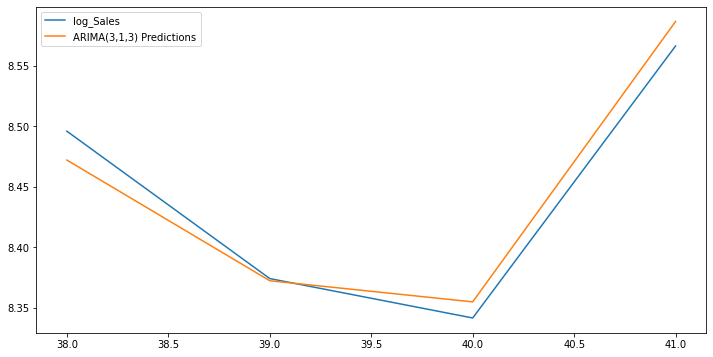

In [46]:
test_2['log_Sales'].plot(legend=True,figsize=(12,6)) # comparing predicted and actual
predictions.plot(legend=True)
plt.show()

In [50]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test_2['log_Sales'], predictions)
np.round(error*100,4)

1.7031

In [57]:
model2 = ARIMA(coco['log_Sales'],order=(3,2,2)) # final model building with whole data
results2 = model2.fit()
predited = results2.predict(len(coco)-2,len(coco)+5,typ='levels')
predited = predited.rename('ARIMA(3,2,1) Forecast')

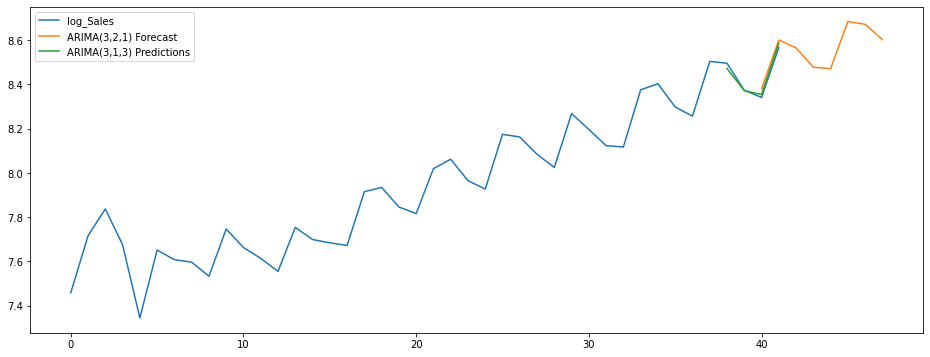

In [58]:
coco['log_Sales'].plot(legend=True,figsize=(16,6))
predited.plot(legend=True)
predictions.plot(legend=True)
plt.show()

In [55]:
predited # predicted value

40    8.380141
41    8.600922
42    8.565251
43    8.478006
44    8.471471
45    8.684848
46    8.671949
47    8.602831
Name: ARIMA(3,2,1) Forecast, dtype: float64

In [60]:
results2.forecast(4) # forecasting the data

(array([8.56525112, 8.47800555, 8.47147077, 8.68484792]),
 array([0.06274758, 0.08221025, 0.08622394, 0.09169852]),
 array([[8.44226811, 8.68823412],
        [8.31687642, 8.63913468],
        [8.30247495, 8.64046659],
        [8.50512213, 8.8645737 ]]))